In [58]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

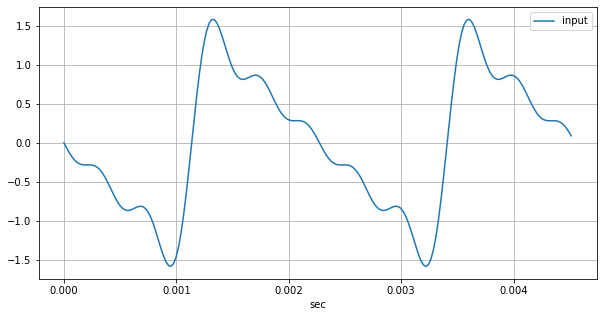

In [72]:
def sawtooth(f0, dur, N, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency
# N:   number of harmonics to generate

    # fundamental mode
    x = -np.sin(2*np.pi*f0*np.arange(dur*fs)/fs)

    # adding harmonic modes
    for n in range(N-1):
        x = x + np.power(-1,n+2)/(n+2)*np.sin(2*np.pi*(n+2)*f0*np.arange(dur*fs)/fs)

    return x


x = sawtooth(440, 1, 5, 44100)
fs = 44100
        
plt.figure(figsize=(10, 5))

n= np.arange(200)

plt.plot(n/fs, x[:200],)
plt.grid(True)
plt.xlabel('sec')
plt.legend(['input'])

ipd.Audio(x, rate=fs)


<StemContainer object of 3 artists>

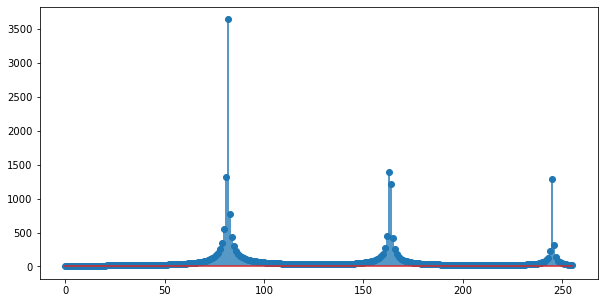

In [75]:
N = 2048*4
x_seg = x[:N]

# zero-padding
# x_seg = np.append(x_seg, np.zeros(2048))

X= np.fft.fft(x_seg)

X_mag = np.abs(X)
X_phs = np.angle(X)

plt.figure(figsize=(10,5))
plt.stem(X_mag[:256])


#plt.figure(figsize=(10, 5))
#plt.stem(X_phs[:256])


# Load audio files

In [76]:
filename = "../audio/095_Coffee_House_10s.wav"

# 22050Hz is the default sampling rate: resamples the input to 22050Hz
# Mono is the default number or channel: mix stereo to mono 

y, sr = librosa.load(filename) 
#y, sr = librosa.load(filename, sr=None) # use the native sampling rate
#y, sr = librosa.load(filename, sr=None, mono=False) # use the native sampling rate and native channels

print(y.shape)
print(sr)

(221556,)
22050


In [77]:
ipd.Audio(y, rate=sr)


# Display waveforms


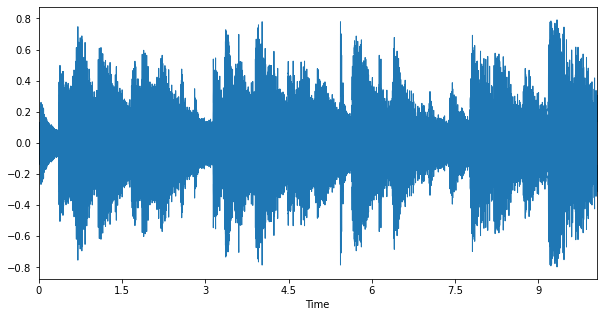

In [78]:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(y, sr=sr)

# Compute spectrogram

In [21]:
hop_length = 512
n_fft = 2048
#Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
Y = librosa.stft(y, window='hann', n_fft=n_fft, hop_length=hop_length)

# magnitude compression: linear to dB
D = librosa.amplitude_to_db(np.abs(Y), ref=np.max)

# Display Spectrogram


Text(0.5, 1.0, 'Linear-frequency spectrogram')

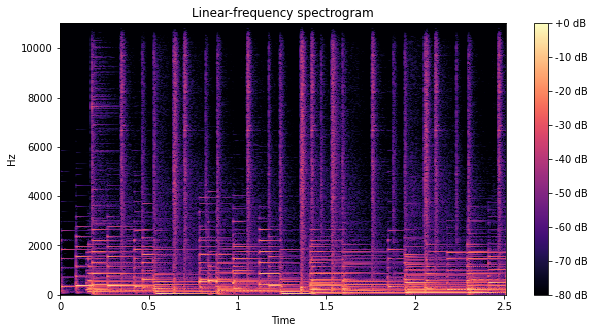

In [79]:
plt.figure(figsize=(10, 5))

img = librosa.display.specshow(D, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')

# Spectrogram with different window lengths


Text(0.5, 1.0, 'Linear-frequency spectrogram (short window)')

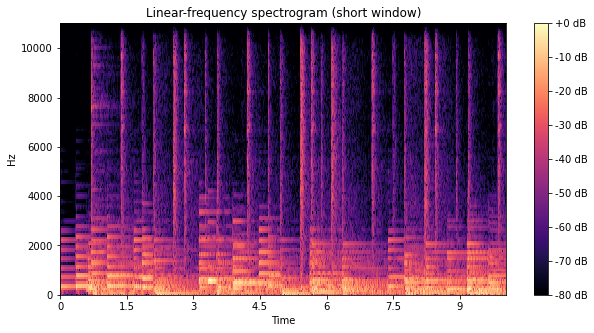

In [23]:
# short window
hop_length = 128
n_fft = 256

Y1 = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D1 = librosa.amplitude_to_db(np.abs(Y1), ref=np.max)

plt.figure(figsize=(10, 5))

img = librosa.display.specshow(D1, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram (short window)')

Text(0.5, 1.0, 'Linear-frequency spectrogram (long window)')

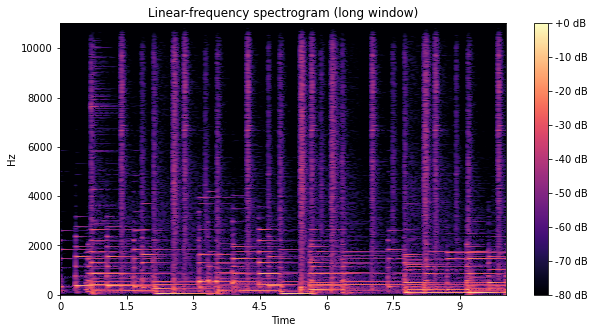

In [24]:
# long window
hop_length = 128
n_fft = 4096

Y2 = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D2 = librosa.amplitude_to_db(np.abs(Y2), ref=np.max)


plt.figure(figsize=(10, 5))

img = librosa.display.specshow(D2, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram (long window)')